## Representation of Pauli Operators

A Pauli operator $Q \in \cal{P}_n$ can be represented by a complex matrix of dimensions $2^n \times 2^n$ but this requires $2^{2n}$ complex numbers.

The Pauli operator $Q$ can be written as:
\begin{equation*}
    Q = \rho_Q X^{\delta} Z^{\tau}  \quad \delta,\tau \in \mathbb{F}_2^{n},
\end{equation*}
where $X^{\delta} = X^{\delta_1} \otimes X^{\delta_2} \otimes \cdots \otimes X^{\delta_n}$ and $Z^{\tau} = Z^{\tau_1} \otimes Z^{\tau_2} \otimes \cdots \otimes Z^{\tau_n}$.

Let's define a map $\phi: \cal{P}_n \rightarrow \mathbb{F}_2^{n}$ as:
\begin{equation*}
    \phi(Q) = \phi(\rho_Q X^{\delta Z^{\tau}}) := [\delta | \tau] := [H_x | H_z]
\end{equation*}
$\delta$ is the $H_x$ parity check matrix for the operators, and $\tau$ is the $H_z$ parity check matrix.

For a single Pauli operator, after such map it can be represented as:
\begin{equation*}
    \phi(X) = [1 | 0], \quad \phi(Z) = [0 | 1], \quad \phi(Y) = [1 | 1].
\end{equation*}



### Example
Let $Q = Y\otimes X \otimes I \otimes Z = YXIZ = Y_0 X_1 Z_3 = -iZX \otimes X \otimes I \otimes Z = iXZ\otimes X\otimes I \otimes Z\dots$ then
\begin{equation*}
    \phi(Q) = [1100|1001]
\end{equation*}


In [1]:
from quick.core.utils.pauli import pauli_to_symplectic
# Binary symplectic representation of Pauli
pauli_to_symplectic('YXIZ')

array([1, 1, 0, 0, 1, 0, 0, 1])

Therefore, a list of Pauli operators from $\cal{P}_n$ can be expressed as a matrix:
### Example
Let $S = [Y_0X_1Z_3, X_0Y_3, Z_2]$ then the set $S$ can be represented as:
\begin{equation*}
\begin{bmatrix}
    1 & 1 & 0 & 0 & 1 & 0 & 0 & 1 \\
    1 & 0 & 0 & 1 & 0 & 0 & 0 & 1 \\
    0 & 0 & 0 & 0 & 0 & 1 & 0 & 0
\end{bmatrix}
\end{equation*}

The above matrix representation is called **binary symplectic representation**.

In [2]:
# Binary symplectic representation of Pauli
S = ['YXIZ','XIIY','IIZI']
pauli_to_symplectic(S)

array([[1, 1, 0, 0, 1, 0, 0, 1],
       [1, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0]])

## Stabilizer code
### Five-qubit code
The stabilizer generators for the five-qubit ($[[5,1,3]]$) code is:
\begin{equation*}
        \begin{aligned}
         X\otimes Z\otimes Z\otimes X\otimes I \\
         I\otimes X\otimes Z\otimes Z\otimes X \\
         X\otimes I\otimes X\otimes Z\otimes Z \\
         Z\otimes X\otimes I\otimes X\otimes Z 
        \end{aligned}
\end{equation*}
The logical X and Z operators are:
\begin{equation*}
            \overline{X} = X\otimes X\otimes X\otimes X\otimes X, \quad
            \overline{Z} = Z\otimes Z\otimes Z\otimes Z\otimes Z
\end{equation*}


In [3]:
from quick.dataset.common import FiveQubit
from quick.core.utils.pauli import pauli_to_hx, pauli_to_hz, symplectic_to_pauli

# Stab_gen = symplectic_to_pauli(fivequbit_code().stabilizer)
FiveQubit()
Stab_gen = symplectic_to_pauli(FiveQubit().H)
Lx = symplectic_to_pauli(FiveQubit().logical_op[0])
Lz = symplectic_to_pauli(FiveQubit().logical_op[1])

# The stabilizer generators
print('The stabilizer generators of Five-qubit code are', Stab_gen)
# The logical operators
print('The logical X operators are', Lx, 'and logical Z operators are', Lz)


The stabilizer generators of Five-qubit code are ['XZZXI', 'IXZZX', 'XIXZZ', 'ZXIXZ']
The logical X operators are XXXXX and logical Z operators are ZZZZZ


### Notation
$[[n,k,d]]$ for a quantum error correction code means: encoding $k$ logical qubits in $n$ physical qubits with distance $d$, the number of generators is $n-k$. This code can correct $\lfloor{(d-1)/2}\rfloor$ errors. 

Taking an $[[n,k,d]]$ code:
The classical equivalent to this is an $[n,k,d]$code, which is a code referring to the number of bits $n$, encoding $k$ bits. The third number $d$, is the minimum Hamming distance taken between any two codewords. This is equal to the minimum Hamming weight (i.e. number of non-zero bits) of non-zero codewords.

As per the classical case, **in the quantum case**, the first two numbers are referring to the numbers of qubits, $n$, that encode $k$ qubits. $d$ is still used to refer to distance, but the definition of distance has to be changed:
The weight, $t$, of a Pauli operator $E_a$, is the number of qubits that a (single-qubit) Pauli operator ($X,Y,Z$) acts on. As an example, arbitrarily taking $E_1 = X\otimes I\otimes I\otimes Z\otimes I$, $E_1$ has a weight $t=2$. The distance is then the minimum weight that the overlap of a Pauli operator (in the space of possible errors) acting on a codeword, with a different codeword is non-zero, or the minimum weight such that $\bra{j}E_a \ket{i}\neq C_a \delta_{ji} $ for some (real) $C_{a}$ for all codewords $i$ and $j$. That is, the distance is the minimum number of errors that can occur on a codeword that causes it to be mapped to a different codeword.


In our QuICK package, *stabilizer_code* class provides information for all these properties:

In [4]:
n = FiveQubit().num_physical
k = FiveQubit().num_logical
d = FiveQubit().distance

# The properties of five-qubit code
print(f"Five-qubit code is a [[{n}, {k}, {d}]] code.")


Five-qubit code is a [[5, 1, 3]] code.


And I'll present an example about how to use those quantum eorror correction stabilizer codes.

The quantum circuit depicted below is designed using Qiskit to implement the Five-qubit code for quantum error correction. It starts by encoding five physical qubits ($q_0$) for error resilience. To detect errors, the circuit measures stabilizer generators, utilizing four ancillary qubits ($ancilla$) for this purpose. Depending on the outcomes of these syndrome measurements, it applies specific Pauli correction operators to rectify any detected errors. This step is followed by an inverse decoding circuit to retrieve the original quantum information. 

In essence, the quantum error correction process involves four key stages: encoding the qubits for protection, measuring syndromes to detect errors, applying corrections based on these measurements, and finally decoding the corrected qubits.

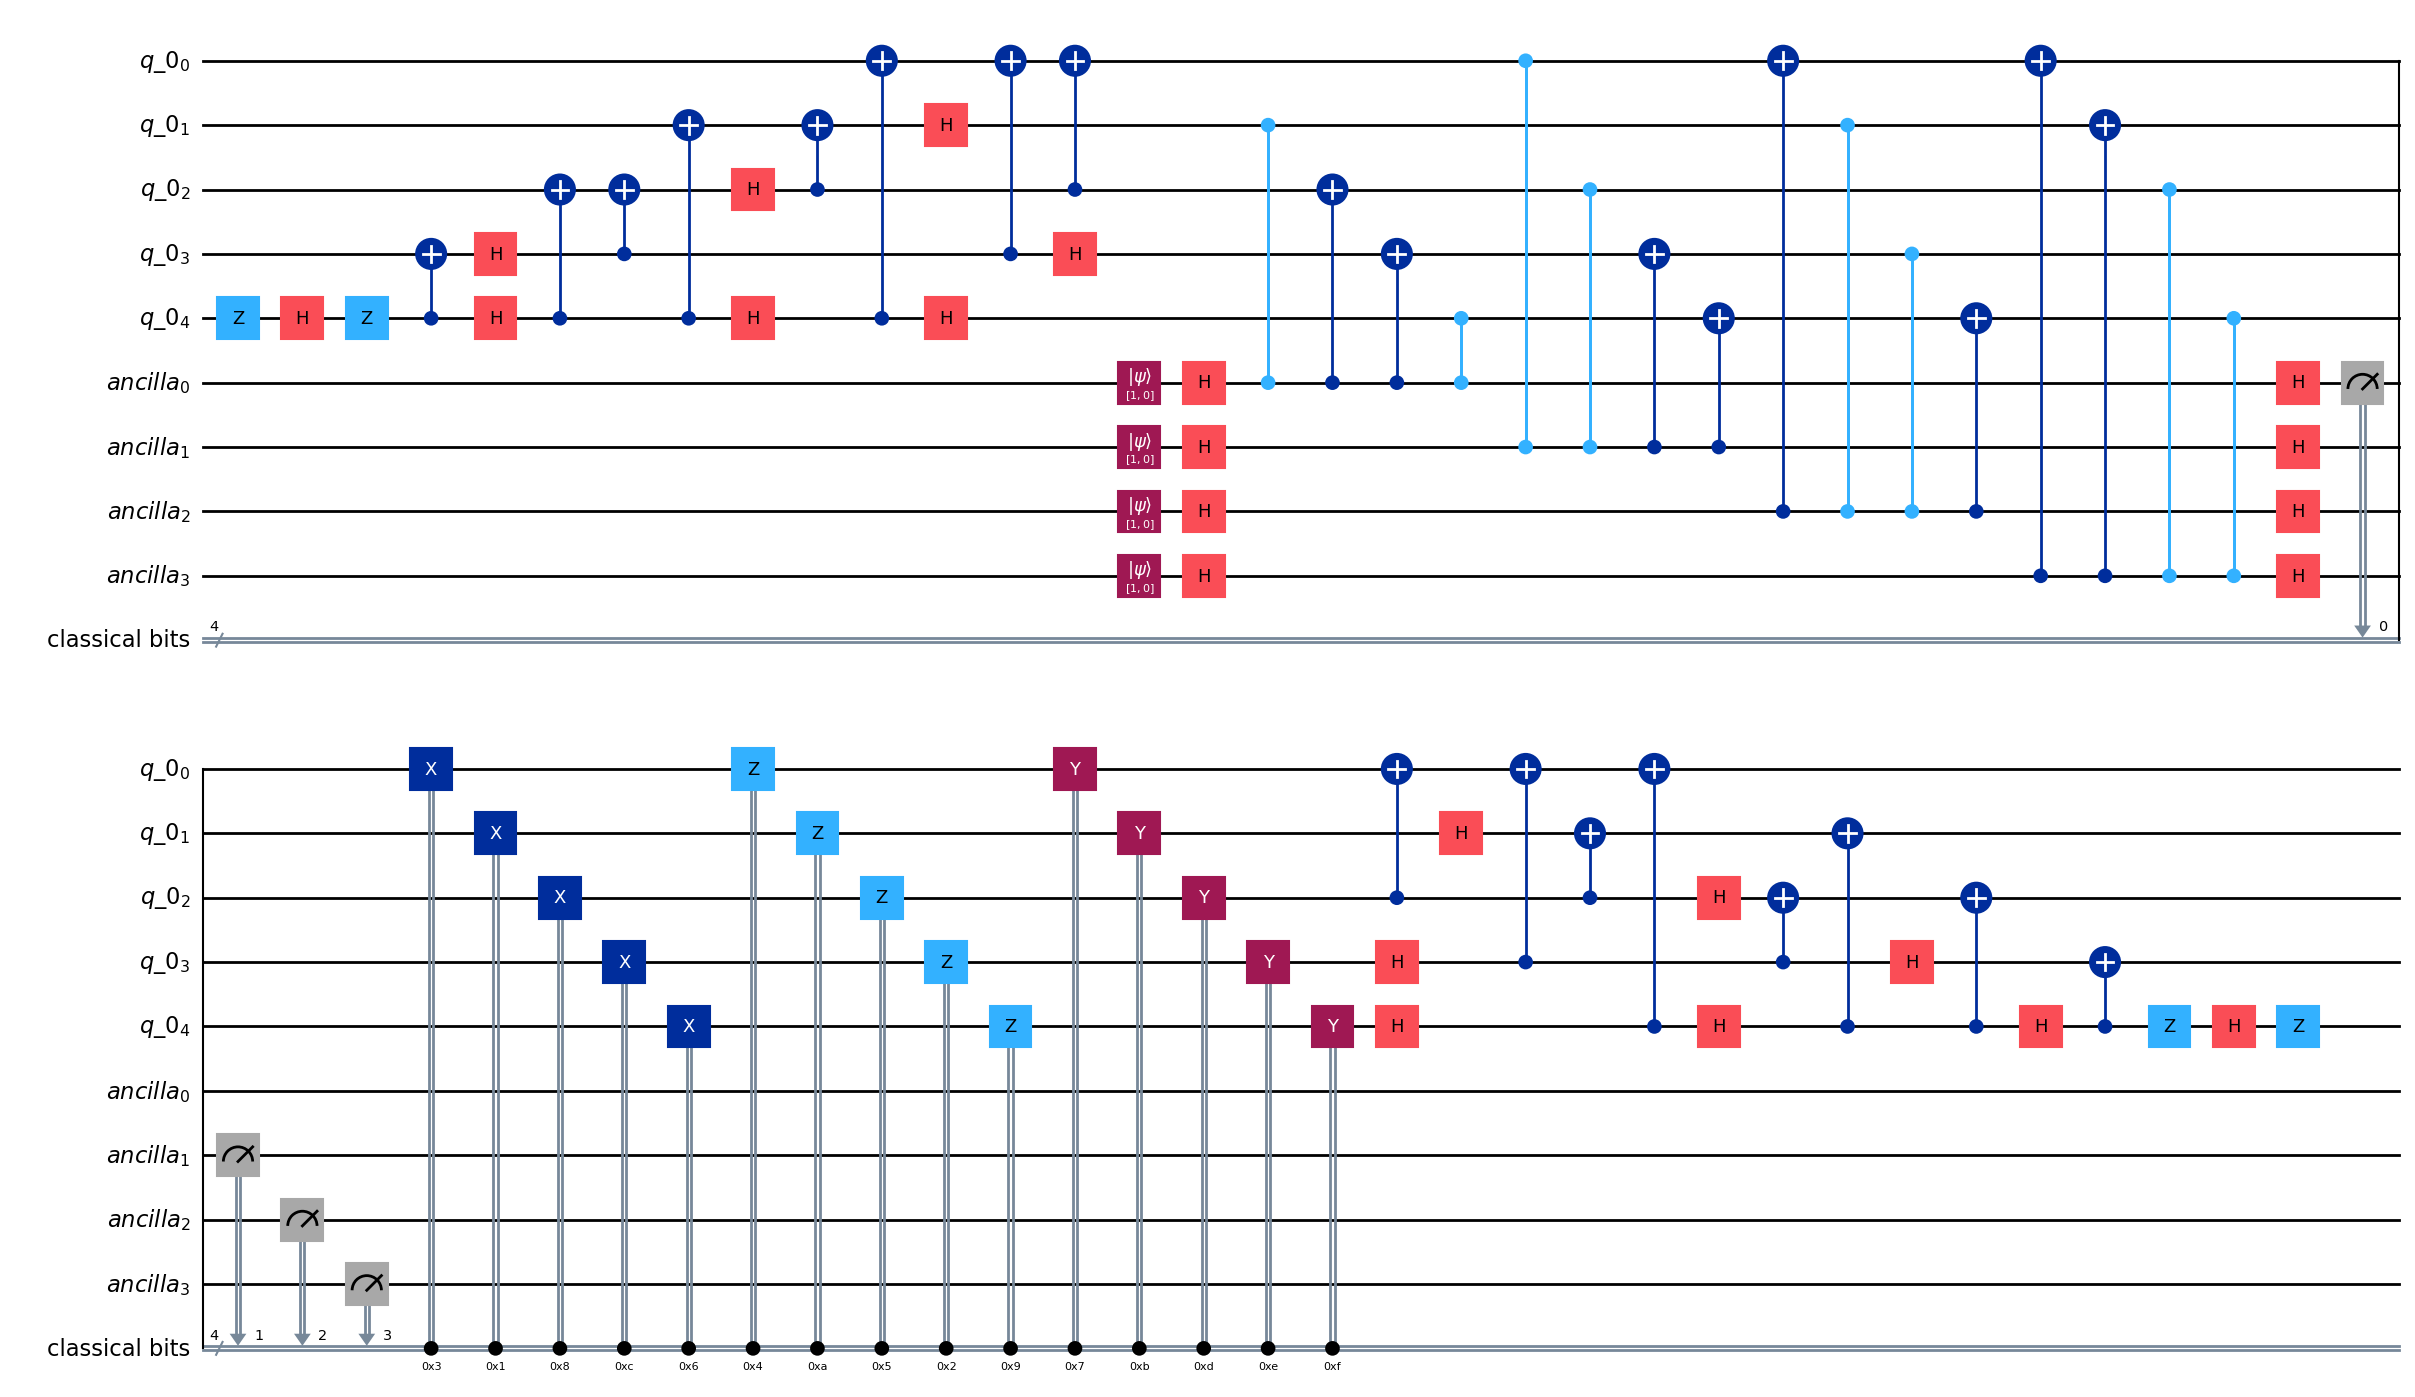